### Plots for the paper

In [1]:
################## IMPORT LIBRARIES ##################
import sys
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import soundfile as sf
from IPython.display import Audio, display, HTML
import torch
from os.path import join as pjoin


In [2]:
################## IMPORT MY MODULES ##################
sys.path.append('../src')

import helpers as hlp
import evaluation
import dataset as ds
import trainer
import models
import loss_mel, loss_stft, loss_waveform, loss_embedd

importlib.reload(evaluation)
importlib.reload(hlp)
importlib.reload(ds)
importlib.reload(trainer)
importlib.reload(models)
importlib.reload(loss_mel)
importlib.reload(loss_stft)
importlib.reload(loss_waveform)
importlib.reload(loss_embedd)


/home/ubuntu/Data/joanna-venvs/wave-u-net2/lib/python3.8/site-packages/pysepm/qualityMeasures.py:121: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def lpcoeff(speech_frame, model_order):
/home/ubuntu/Data/joanna-venvs/wave-u-net2/lib/python3.8/site-packages/pysepm/qualityMeasures.py:209: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def find_loc_peaks(slope,ene

<module 'loss_embedd' from '/home/ubuntu/joanna/reverb-match-cond-u-net/notebooks/../src/loss_embedd.py'>

In [3]:
################## LOAD CSV WITH EVALUATION RESULTS ##################
df_models=pd.read_csv("/home/ubuntu/Data/RESULTS-reverb-match-cond-u-net/runs-exp-20-05-2024/models_230525_evaluation.csv")
df_baselines=pd.read_csv("/home/ubuntu/Data/RESULTS-reverb-match-cond-u-net/runs-exp-20-05-2024/baselines_230525_evaluation.csv")
df_oracle=pd.read_csv("/home/ubuntu/Data/RESULTS-reverb-match-cond-u-net/runs-exp-20-05-2024/oracle_230525_evaluation.csv")
df_oracle2=pd.read_csv("/home/ubuntu/Data/RESULTS-reverb-match-cond-u-net/runs-exp-20-05-2024/oracle_150425_evaluation.csv")


df=pd.concat([df_models, df_baselines,df_oracle,df_oracle2], ignore_index=True)
display(df[df["idx"]==2])
len(df)

,label,idx,compared,1L_multi-stft-mag,1L_stft-mag,1L_multi-wave,1L_wave,1L_logmel,1L_multi-mel,1S_sisdr,...,2S_stoi,3D_pesq,3D_stoi,3D_sisdr,3D_mos_nidiff,3D_pesq_nidiff,3D_stoi_nidiff,3D_sisdr_nidiff,3D_srmr_nidiff,1L_emb_cos
4,10-06-2024--15-02_c_wunet_stft+wave_0.8_0.2_ch...,2,prediction:target,0.308940,0.300605,0.032715,0.038311,0.810621,0.123760,4.590447,...,0.932573,0.062998,0.017961,1.644600,0.018468,0.001841,0.172605,6.752885,2.217134,NaN
5,10-06-2024--15-02_c_wunet_stft+wave_0.8_0.2_ch...,2,prediction:content,0.293747,0.294926,0.037116,0.039252,1.518666,0.163287,7.273793,...,0.939852,0.365717,0.016615,1.971756,0.091168,0.061509,1.384050,7.264590,2.551039,NaN
30004,20-05-2024--22-48_c_wunet_logmel+wave_0.8_0.2_...,2,prediction:target,0.343426,0.333374,0.031414,0.030085,0.819000,0.116786,3.944784,...,0.929896,0.100842,0.021002,0.756582,0.000291,0.006513,0.324055,10.482780,2.378106,NaN
30005,20-05-2024--22-48_c_wunet_logmel+wave_0.8_0.2_...,2,prediction:content,0.227548,0.229724,0.033484,0.026864,1.824092,0.166931,9.432913,...,0.955325,0.327873,0.019656,1.083738,0.073383,0.053157,1.535260,10.994296,2.712010,NaN
60004,anecho+fins,2,prediction:target,0.555491,0.550016,0.050125,0.073497,1.184664,0.168683,-0.237343,...,0.907209,0.141262,0.018162,5.762266,0.001318,0.001132,0.196158,3.546152,0.237573,NaN
60005,anecho+fins,2,prediction:content,0.612823,0.613523,0.061429,0.081450,4.059464,0.301403,-1.195283,...,0.885286,0.357803,0.015116,5.423813,0.039900,0.050625,1.201373,11.703254,0.587801,NaN
90004,dfnet+fins,2,prediction:target,0.557653,0.552487,0.054255,0.081566,2.062608,0.222072,-1.300624,...,0.883031,0.335935,0.041331,6.557494,0.008945,0.023864,0.596023,2.928379,0.756307,NaN
90005,dfnet+fins,2,prediction:content,0.536375,0.540547,0.055536,0.072066,3.929492,0.306839,0.303116,...,0.922564,0.163123,0.038285,6.219041,0.032279,0.025631,0.801649,11.084109,0.406078,NaN
120004,wpe+fins,2,prediction:target,0.585018,0.583538,0.072670,0.090128,4.283085,0.311463,-2.089342,...,0.838153,0.674182,0.072129,7.160210,1.648844,0.143931,2.194298,12.611974,3.231612,NaN
120005,wpe+fins,2,prediction:content,0.542660,0.545723,0.051221,0.054454,1.274794,0.171359,-1.304962,...,0.872606,0.175119,0.069083,6.821756,1.582403,0.094437,0.797127,4.456854,2.881383,NaN


265000

In [4]:
################## ADD COLUMN TO KNOW IF THE SAMPLE IS REV2DRY OR DRY2REV ##################

# divide into re-reverbaration, de-reverberation 
config=hlp.load_config(pjoin("/home/ubuntu/joanna/reverb-match-cond-u-net/config/basic.yaml"))

def get_reverb_ind(config, df, split):
    config["p_noise"]=0
    config["split"]=split
    dataset=ds.DatasetReverbTransfer(config)
    indices_dry2rev=dataset.get_idx_with_rt60diff(-3,-0.3)
    indices_rev2dry=dataset.get_idx_with_rt60diff(0.3,3)
    indices_smalldiff=dataset.get_idx_with_rt60diff(-0.3,0.3)
    df.loc[df["idx"].isin(indices_dry2rev), "rev_delta"] = "dry2rev"
    df.loc[df["idx"].isin(indices_rev2dry), "rev_delta"] = "rev2dry"
    df.loc[df["idx"].isin(indices_smalldiff), "rev_delta"] = "smalldiff"
    return df 

df=get_reverb_ind(config, df, "test")


display(df.head(10))

,label,idx,compared,1L_multi-stft-mag,1L_stft-mag,1L_multi-wave,1L_wave,1L_logmel,1L_multi-mel,1S_sisdr,...,3D_pesq,3D_stoi,3D_sisdr,3D_mos_nidiff,3D_pesq_nidiff,3D_stoi_nidiff,3D_sisdr_nidiff,3D_srmr_nidiff,1L_emb_cos,rev_delta
0,10-06-2024--15-02_c_wunet_stft+wave_0.8_0.2_ch...,0,prediction:target,0.316560,0.308553,0.038128,0.040077,0.861830,0.118547,5.236650,...,0.214489,0.000022,0.224024,0.098130,0.013110,0.122395,0.223545,3.864821,NaN,dry2rev
1,10-06-2024--15-02_c_wunet_stft+wave_0.8_0.2_ch...,0,prediction:content,0.381165,0.377794,0.041645,0.040471,0.844911,0.127504,6.111607,...,0.582476,0.017136,0.183489,0.034562,0.097321,1.990055,16.502991,4.404185,NaN,dry2rev
2,10-06-2024--15-02_c_wunet_stft+wave_0.8_0.2_ch...,1,prediction:target,0.335606,0.330590,0.034249,0.040939,0.655575,0.117664,4.088780,...,0.042023,0.005213,1.139356,0.012367,0.014019,0.399977,2.959488,0.327528,NaN,rev2dry
3,10-06-2024--15-02_c_wunet_stft+wave_0.8_0.2_ch...,1,prediction:content,0.278009,0.277319,0.031022,0.035245,0.343051,0.075436,7.360752,...,0.023332,0.010768,3.181393,0.056401,0.033182,0.647018,4.769280,1.967935,NaN,rev2dry
4,10-06-2024--15-02_c_wunet_stft+wave_0.8_0.2_ch...,2,prediction:target,0.308940,0.300605,0.032715,0.038311,0.810621,0.123760,4.590447,...,0.062998,0.017961,1.644600,0.018468,0.001841,0.172605,6.752885,2.217134,NaN,dry2rev
5,10-06-2024--15-02_c_wunet_stft+wave_0.8_0.2_ch...,2,prediction:content,0.293747,0.294926,0.037116,0.039252,1.518666,0.163287,7.273793,...,0.365717,0.016615,1.971756,0.091168,0.061509,1.384050,7.264590,2.551039,NaN,dry2rev
6,10-06-2024--15-02_c_wunet_stft+wave_0.8_0.2_ch...,3,prediction:target,0.303669,0.294046,0.036301,0.028893,0.498894,0.104404,5.103802,...,0.103628,0.034922,3.021787,0.048022,0.019489,0.719506,2.385840,0.039854,NaN,smalldiff
7,10-06-2024--15-02_c_wunet_stft+wave_0.8_0.2_ch...,3,prediction:content,0.252131,0.249548,0.036384,0.042716,0.339734,0.083056,7.745724,...,0.178815,0.038220,4.316978,0.007060,0.020213,1.104712,5.398553,0.294601,NaN,smalldiff
8,10-06-2024--15-02_c_wunet_stft+wave_0.8_0.2_ch...,4,prediction:target,0.290740,0.268031,0.024345,0.036204,0.681078,0.112585,4.242740,...,0.125478,0.009688,0.398726,0.046789,0.040108,0.408062,0.835566,0.410545,NaN,rev2dry
9,10-06-2024--15-02_c_wunet_stft+wave_0.8_0.2_ch...,4,prediction:content,0.317835,0.324616,0.035660,0.048079,1.175074,0.169587,6.018371,...,0.049353,0.021932,3.672244,0.369606,0.023749,0.731699,2.798007,0.508923,NaN,rev2dry


In [5]:
################## GIVE MORE CONCISE TAGS FOR EACH CATEGORY ##################

def impove_categories_tags(df): 
       # add a column to store a shorter tag identifying each category
       df['short_label'] = df['label'].apply(lambda x: x.split('_', 1)[1] if "_" in x else x)
       df['short_label'] = df['short_label'].apply(lambda x: x.replace("checkpoint","ch"))
       df['tag'] = df['short_label']+ ' -> ' + df['compared']
       df['tag'] = df['tag'].apply(lambda x: x.replace("target","tar"))
       df['tag'] = df['tag'].apply(lambda x: x.replace("prediction","pred"))
       # create a custom order of the files so that the plots have similar order as before
       custom_order=["oracle -> tar:anecho", "oracle -> tar:tarclone" , "oracle -> tar:content",  "oracle -> content:style", "oracle -> tar:style", "anecho+fins -> pred:tar", "dfnet+fins -> pred:tar", "wpe+fins -> pred:tar",
              "c_wunet_stft+wave_0.8_0.2_chbest -> pred:tar", "c_wunet_logmel+wave_0.8_0.2_chbest -> pred:tar", "c_wunet_logmel_1_chbest -> pred:tar", "c_wunet_stft_1_chbest -> pred:tar",
              "c_wunet_stft_1_ch50 -> pred:tar", "c_wunet_stft_1_ch10 -> pred:tar", "c_wunet_stft_1_ch0 -> pred:tar"]
       df['tag'] = pd.Categorical(df['tag'], categories=custom_order, ordered=True)
       df=df.sort_values("compared")
       df=df.drop(columns=['short_label'])
       df=df.sort_values("tag")
       return df

df=impove_categories_tags(df)

df.head()

,label,idx,compared,1L_multi-stft-mag,1L_stft-mag,1L_multi-wave,1L_wave,1L_logmel,1L_multi-mel,1S_sisdr,...,3D_stoi,3D_sisdr,3D_mos_nidiff,3D_pesq_nidiff,3D_stoi_nidiff,3D_sisdr_nidiff,3D_srmr_nidiff,1L_emb_cos,rev_delta,tag
235073,oracle,7518,target:anecho,0.548793,0.532989,0.059864,0.056638,1.385740,0.171601,2.265616,...,0.103429,96.589592,0.607045,0.101129,1.824160,17.327843,9.483186,0.993566,rev2dry,oracle -> tar:anecho
218896,oracle,3779,target:anecho,0.327638,0.333083,0.045030,0.033408,1.266677,0.156643,5.511283,...,0.084401,91.704819,0.016812,0.172975,2.085158,13.829203,0.245986,0.983274,smalldiff,oracle -> tar:anecho
197994,oracle,14331,target:anecho,0.268450,0.264870,0.030483,0.025409,1.983527,0.200306,7.982451,...,0.044709,88.539070,0.389709,0.077954,1.734776,10.045227,2.601738,NaN,rev2dry,oracle -> tar:anecho
218891,oracle,3778,target:anecho,0.386584,0.388984,0.057539,0.077816,1.945347,0.179610,4.453724,...,0.134216,92.940033,0.091851,0.163091,1.585066,19.498009,13.854200,0.978929,smalldiff,oracle -> tar:anecho
197997,oracle,14332,target:anecho,0.307717,0.313136,0.030281,0.032320,1.578403,0.205614,7.028075,...,0.054806,86.711868,0.009793,0.103464,1.902194,10.561273,3.202696,NaN,smalldiff,oracle -> tar:anecho


In [6]:
# TABLE WITH ALL OBJECTIVE RESULTS

# df_sel=df[df["rev_delta"]=="dry2rev"]
# df_sel=df[df["rev_delta"]=="rev2dry"]
df_sel=df

df_g=df_sel.groupby("tag").mean(numeric_only=True).round(decimals=3).reset_index()
cols=df_sel.groupby("tag").groups.keys()
df_g_sel=df_g[['1L_multi-mel', '1L_multi-wave','1L_emb_euc','1L_emb_cos','1S_sisdr','2L_lsd', '2L_multi-stft', '2L_mcd' , '2S_fwsnr', '3D_pesq', '3D_stoi', '3D_mos_nidiff', '3D_pesq_nidiff', '3D_stoi_nidiff', '3D_sisdr_nidiff', '3D_srmr_nidiff']]
df_g_sel["tag"]=cols
searchfor=["ch0","ch10","ch50","tar:anecho","logmel_1_","stft_1_"]
df_av=df_g_sel[~df_g_sel["tag"].str.contains('|'.join(searchfor))]
# df_av.to_csv("results-200325-derev-5k.csv")

df_av

/tmp/ipykernel_962891/230627171.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_g_sel["tag"]=cols


,1L_multi-mel,1L_multi-wave,1L_emb_euc,1L_emb_cos,1S_sisdr,2L_lsd,2L_multi-stft,2L_mcd,2S_fwsnr,3D_pesq,3D_stoi,3D_mos_nidiff,3D_pesq_nidiff,3D_stoi_nidiff,3D_sisdr_nidiff,3D_srmr_nidiff,tag
1,0.098,0.040,17.549,0.996,3.589,1.493,0.882,2.044,15.013,0.096,0.010,0.204,0.023,0.254,2.365,0.999,oracle -> tar:tarclone
2,0.170,0.051,24.777,0.991,1.622,1.891,1.091,3.192,11.606,0.378,0.024,0.450,0.054,0.854,5.439,1.407,oracle -> tar:content
3,0.827,0.230,33.562,0.984,-41.759,10.334,3.215,17.486,1.850,0.681,0.670,0.693,0.065,0.950,7.343,2.683,oracle -> content:style
4,0.818,0.230,30.541,0.987,-40.424,10.053,3.180,17.213,1.945,0.679,0.669,0.618,0.045,0.480,5.416,2.512,oracle -> tar:style
5,0.170,0.052,19.400,NaN,-0.943,1.931,1.123,3.786,10.323,0.135,0.016,0.447,0.032,0.332,3.341,1.282,anecho+fins -> pred:tar
6,0.263,0.067,20.859,NaN,-2.833,2.443,1.437,4.611,7.998,0.228,0.064,0.658,0.065,0.606,6.317,1.489,dfnet+fins -> pred:tar
7,0.231,0.070,24.452,NaN,-4.123,2.389,1.368,5.135,8.507,0.394,0.104,0.919,0.133,1.031,9.792,1.956,wpe+fins -> pred:tar
8,0.133,0.039,18.240,NaN,4.358,1.703,0.944,2.410,12.882,0.197,0.022,0.332,0.037,0.583,4.245,1.338,c_wunet_stft+wave_0.8_0.2_chbest -> pred:tar
9,0.136,0.042,18.803,NaN,2.544,1.748,1.009,2.471,12.696,0.182,0.022,0.334,0.035,0.553,4.120,1.345,c_wunet_logmel+wave_0.8_0.2_chbest -> pred:tar


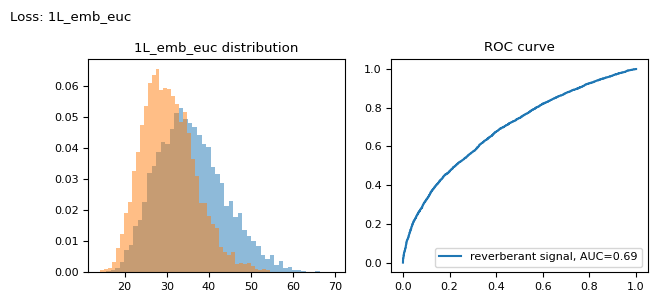

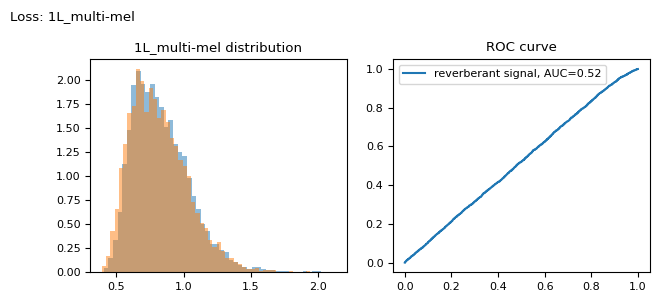

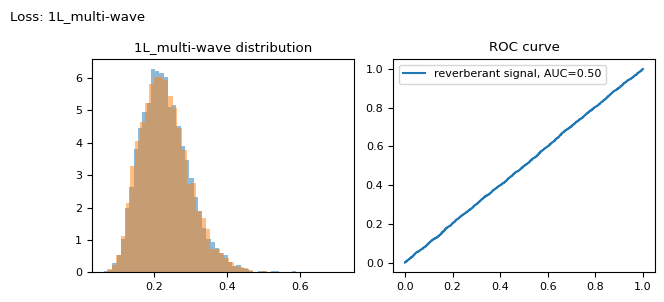

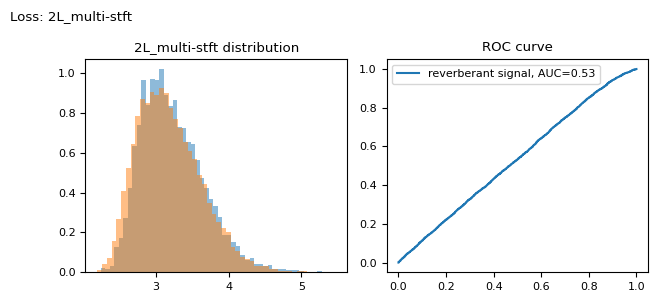

In [7]:
# ROC ANALYSIS
import sklearn.metrics as metrics

################## DEFINE FUNCTIONS ##################

def compute_and_plot_rocs(losstype, df_losses, x_range=None, flipsign=False):
    data_diff_rooms=df_losses[(df_losses["tag"]=="oracle -> content:style")][losstype].tolist()
    data_same_rooms=df_losses[(df_losses["tag"]=="oracle -> tar:style")][losstype].tolist()

    # Plot distribu
    plt.rcParams.update({'font.size': 8}) 
    plt.figure(figsize=(12,3))
    plt.subplot(1,4,3)
    plt.hist(data_diff_rooms, alpha=0.5,bins=50,label="room1:room2",density=True) 
    plt.hist(data_same_rooms, alpha=0.5,bins=50,label="room1a:room1b",density=True)
    plt.title(f'{losstype} distribution')

    # Compute ROC to see if the network is able to distinguish between two enviromnents
    binary_labels=[0 for i in range(len(data_same_rooms))] + [1 for i in range(len(data_diff_rooms))]
    vals=data_same_rooms+data_diff_rooms
    fpr, tpr, thresholds = metrics.roc_curve(binary_labels,vals)

    if flipsign==True:
        fpr=1-fpr; tpr=1-tpr
        fpr_e=1-fpr_e; tpr_e=1-tpr_e
        fpr_l=1-fpr_l; tpr_l=1-tpr_l

    roc_auc = metrics.auc(fpr, tpr)
    plt.subplot(1,4,4)
    plt.plot(fpr,tpr,label=f"reverberant signal, AUC={roc_auc:.2f}")
    plt.title(f'ROC curve')
    plt.legend()
    plt.suptitle("Loss: " +losstype)
    plt.tight_layout()
    plt.show()

df_bigdiff=df[(df["rev_delta"]=="dry2rev") |( df["rev_delta"]=="rev2dry")]

compute_and_plot_rocs("1L_emb_euc", df_bigdiff)
compute_and_plot_rocs("1L_multi-mel", df_bigdiff)
compute_and_plot_rocs("1L_multi-wave", df_bigdiff)
compute_and_plot_rocs("2L_multi-stft", df_bigdiff)